# 2_motivating_facts_v5

With the dataset ``SCF+`` and methodology from [Kuhn, Schularick and Steins (2020)](https://www.journals.uchicago.edu/doi/10.1086/708815), we estimate the dynamic Gini coefficients on wealth and income for the U.S. households from 1950 to 2016 for three wealth-level samples:
- all wealth levels
- bottom 95%
- bottom 90%

The dataset is saved as ``SCF_plus.dta``, and we do the estimation using Stata, please see [here](https://github.com/jstac/collaboration_with_shu/tree/master/3_thesis_public/generate_ginis).

In this section, first, we tabularly and graphically present the dynamic wealth and income Gini coefficients and measures their mean, variance and autocorrelation coefficients, which would become targets for our calibration and quantitative experiments. Then we briefly discuss those observations and stylized facts, in accordingly with some questions of interest.

In [1]:
# with some imports

import solve_model as sm
import inequality_measure_plot as imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2.1 wealth and income ginis in the U.S.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jstac/inequality_dynamics/master/thesis/generate_ginis/ginis_all_b99_b90.csv?token=AM3OYILBL35YLAK6KGPKPU264ZDSW')

In [3]:
df

,yearmerge,gini_tinc,gini_tinc_B99,gini_tinc_B90,gini_ffanw,gini_ffanw_B99,gini_ffanw_B90
0,1950,44,39,32,83,75,64
1,1953,43,39,32,81,74,59
2,1956,45,41,34,81,75,62
3,1959,44,39,33,80,74,60
4,1962,44,40,33,81,75,61
5,1965,44,39,32,79,74,61
6,1968,43,39,33,80,74,61
7,1971,43,39,33,79,74,62
8,1977,46,42,34,76,71,58
9,1983,46,41,35,78,69,59


### 2.1.1 window time 1: from 1950 to 2016

In [4]:
year1, income_ginis_all, wealth_ginis_all = imp.generate_ginis(df)
year2, income_ginis_99, wealth_ginis_99 = imp.generate_ginis(df, income_ginis_xx='gini_tinc_B99', wealth_ginis_xx='gini_ffanw_B99')
year3, income_ginis_90, wealth_ginis_90 = imp.generate_ginis(df, income_ginis_xx='gini_tinc_B90', wealth_ginis_xx='gini_ffanw_B90')

year = [year1, year2, year3]
income_ginis = [income_ginis_all, income_ginis_99, income_ginis_90]
wealth_ginis = [wealth_ginis_all, wealth_ginis_99, wealth_ginis_90]

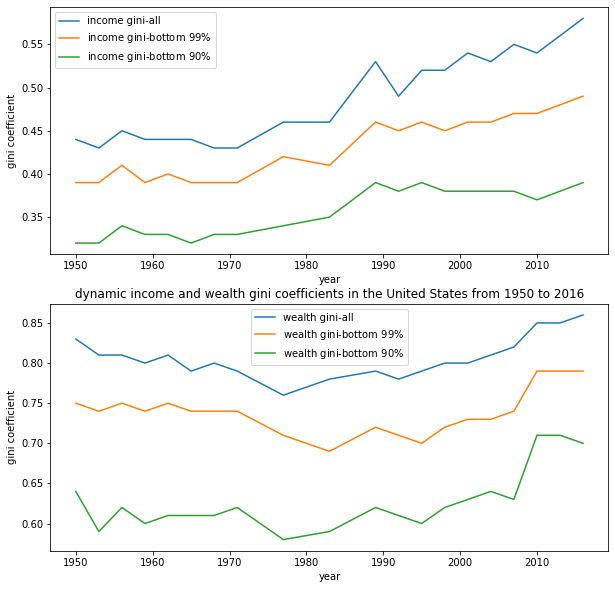

In [5]:
imp.plot_generating_ginis(year, income_ginis, wealth_ginis)

In [6]:
imp.measure_mean_var_autocorr(income_ginis_all)

Respectively, the mean, variance and autocorrelation of income ginis-all 0.48900000000000005 0.002539000000000001 -0.43850562566730444


(0.48900000000000005, 0.002539000000000001, -0.43850562566730444)

In [7]:
imp.measure_mean_var_autocorr(wealth_ginis_all, ginis_type='wealth ginis-all')

Respectively, the mean, variance and autocorrelation of wealth ginis-all 0.8065 0.000612749999999999 0.09689859494111117


(0.8065, 0.000612749999999999, 0.09689859494111117)

### 2.1.2 window time 2: from 1965 to 1983

Let's zoom in the pictures to see the stylized facts about income and wealth Gini coefficients during the so-called [oil crisis](https://en.wikipedia.org/wiki/1973_oil_crisis) period

In [8]:
df2 = df[5:10]
df2

,yearmerge,gini_tinc,gini_tinc_B99,gini_tinc_B90,gini_ffanw,gini_ffanw_B99,gini_ffanw_B90
5,1965,44,39,32,79,74,61
6,1968,43,39,33,80,74,61
7,1971,43,39,33,79,74,62
8,1977,46,42,34,76,71,58
9,1983,46,41,35,78,69,59


In [9]:
year4, income_ginis_all2, wealth_ginis_all2 = imp.generate_ginis(df2)
year5, income_ginis_992, wealth_ginis_992 = imp.generate_ginis(df2, income_ginis_xx='gini_tinc_B99', wealth_ginis_xx='gini_ffanw_B99')
year6, income_ginis_902, wealth_ginis_902 = imp.generate_ginis(df2, income_ginis_xx='gini_tinc_B90', wealth_ginis_xx='gini_ffanw_B90')

year2 = [year4, year5, year6]
income_ginis2 = [income_ginis_all2, income_ginis_992, income_ginis_902]
wealth_ginis2 = [wealth_ginis_all2, wealth_ginis_992, wealth_ginis_902]

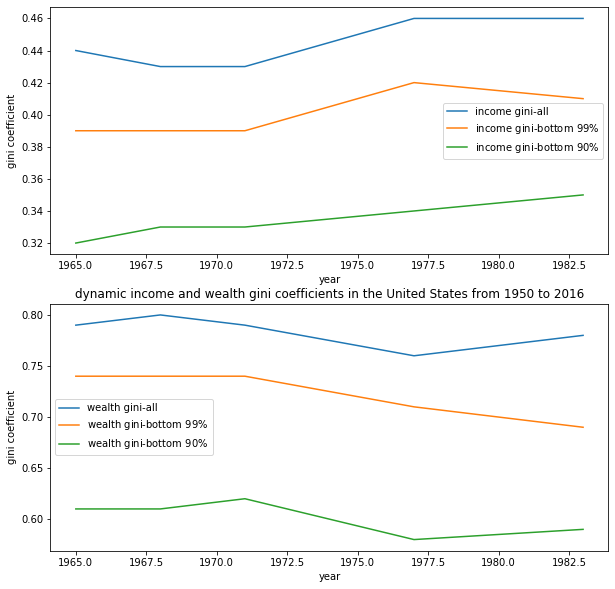

In [11]:
imp.plot_generating_ginis(year2, income_ginis2, wealth_ginis2)

In [12]:
imp.measure_mean_var_autocorr(income_ginis_all2)

Respectively, the mean, variance and autocorrelation of income ginis-all 0.44400000000000006 0.0001840000000000003 -0.09094202898550802


(0.44400000000000006, 0.0001840000000000003, -0.09094202898550802)

In [13]:
imp.measure_mean_var_autocorr(wealth_ginis_all2, ginis_type='wealth ginis-all')

Respectively, the mean, variance and autocorrelation of wealth ginis-all 0.784 0.00018400000000000033 -0.03478260869565217


(0.784, 0.00018400000000000033, -0.03478260869565217)

### 2.1.3 window time 3: from 2000 to 2016

Let's move out of the window time 2 and zoom in the big pictures again to see the stylized facts about income and wealth Gini coefficients during the so-called
[global financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008) period.

In [14]:
df3 = df[14:]
df3

,yearmerge,gini_tinc,gini_tinc_B99,gini_tinc_B90,gini_ffanw,gini_ffanw_B99,gini_ffanw_B90
14,2001,54,46,38,80,73,63
15,2004,53,46,38,81,73,64
16,2007,55,47,38,82,74,63
17,2010,54,47,37,85,79,71
18,2013,56,48,38,85,79,71
19,2016,58,49,39,86,79,70


In [15]:
year7, income_ginis_all3, wealth_ginis_all3 = imp.generate_ginis(df3)
year8, income_ginis_993, wealth_ginis_993 = imp.generate_ginis(df3, income_ginis_xx='gini_tinc_B99', wealth_ginis_xx='gini_ffanw_B99')
year9, income_ginis_903, wealth_ginis_903 = imp.generate_ginis(df3, income_ginis_xx='gini_tinc_B90', wealth_ginis_xx='gini_ffanw_B90')

year3 = [year7, year8, year9]
income_ginis3 = [income_ginis_all3, income_ginis_993, income_ginis_903]
wealth_ginis3 = [wealth_ginis_all3, wealth_ginis_993, wealth_ginis_903]

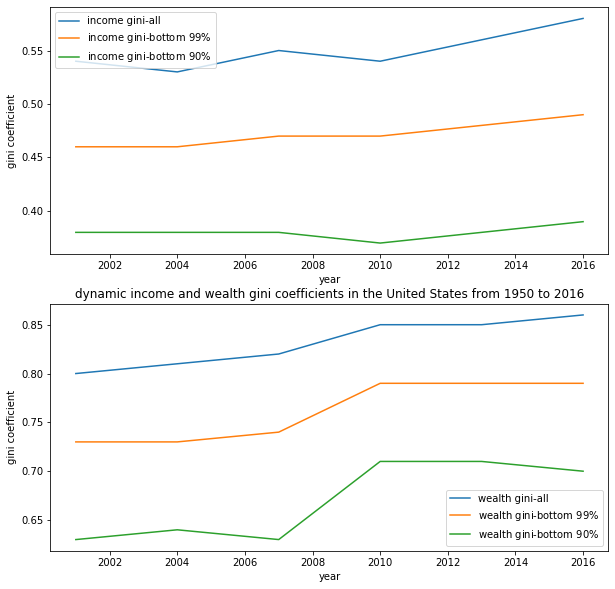

In [19]:
imp.plot_generating_ginis(year3, income_ginis3, wealth_ginis3)

In [20]:
imp.measure_mean_var_autocorr(income_ginis_all3)

Respectively, the mean, variance and autocorrelation of income ginis-all 0.55 0.00026666666666666603 -0.2260416666666669


(0.55, 0.00026666666666666603, -0.2260416666666669)

In [21]:
imp.measure_mean_var_autocorr(wealth_ginis_all3, ginis_type='wealth ginis-all')

Respectively, the mean, variance and autocorrelation of wealth ginis-all 0.8316666666666667 0.0005138888888888878 -0.3344144144144144


(0.8316666666666667, 0.0005138888888888878, -0.3344144144144144)

## 2.2 discussions

Please see my thesis (update soon).